In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('digits.csv')
df.sample()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
1662,0.0,0.0,7.0,15.0,16.0,12.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,10.0,12.0,1.0,0.0,0.0,0.0,9


In [3]:
pixels = df.drop('number_label',axis=1)
pixels.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
pixels.iloc[0].to_numpy().shape

(64,)

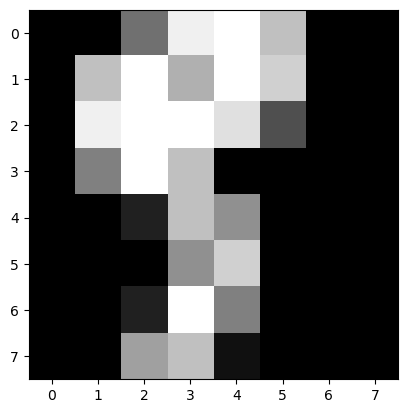

In [11]:
plt.imshow(pixels.iloc[1662].to_numpy().reshape(8,8),cmap='gray')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pixels = scaler.fit_transform(pixels)

In [13]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
pca_pixels_transformed = pca.fit_transform(scaled_pixels)
pca_pixels_transformed

array([[ 1.91419882, -0.95452296],
       [ 0.58900307,  0.9246528 ],
       [ 1.30203095, -0.31721644],
       ...,
       [ 1.02258073, -0.14791389],
       [ 1.07605368, -0.38091572],
       [-1.25773809, -2.22760768]])

In [19]:
np.sum(pca.explained_variance_ratio_)

0.21594970498174557

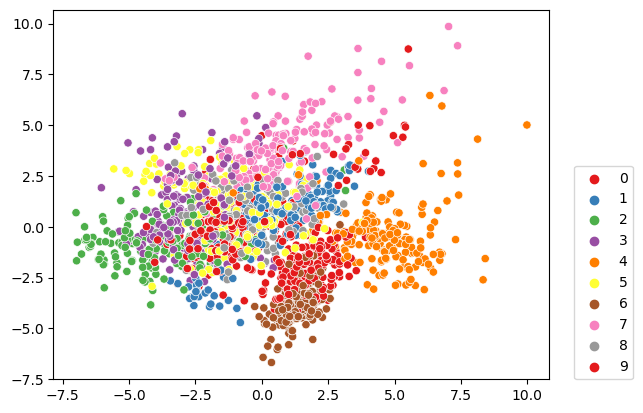

In [23]:
sns.scatterplot(x=pca_pixels_transformed[:,0],y=pca_pixels_transformed[:,1],hue = df['number_label'], palette='Set1')
plt.legend(loc=(1.05,0))